In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\ZEOTAP interview\Products.csv")

In [3]:
print("\nDataset Head:", data.head())
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:", data.describe())


Dataset Head:   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB

Summary Statistics:             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [4]:
#to check if there is any NULL value
print("\nNumber of Missing Values:\n", data.isnull().sum())


Number of Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [6]:
#to check products in each category
cat_count = data['Category'].value_counts()
print("\nProducts per Category:\n", cat_count)


Products per Category:
 Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


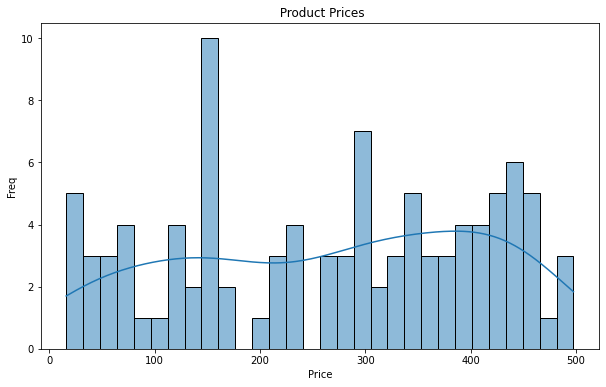

In [8]:
#plots for quantitative values(price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title(' Product Prices')
plt.xlabel('Price')
plt.ylabel('Freq')
plt.show()

In [ ]:
#we can see price between 100-200 approx (160-180) are the popular products in the dataset with high freq, expensive products are having less freq.

In [10]:
#to know top 10  expensive products
top_10_exp = data.nlargest(10, 'Price')
print("Top 10 Most Expensive Products:\n",top_10_exp)

Top 10 Most Expensive Products:
    ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34


In [ ]:
#books are the most expensive category followed by clothing

Text(0.5, 1.0, '100 Cheap Products')

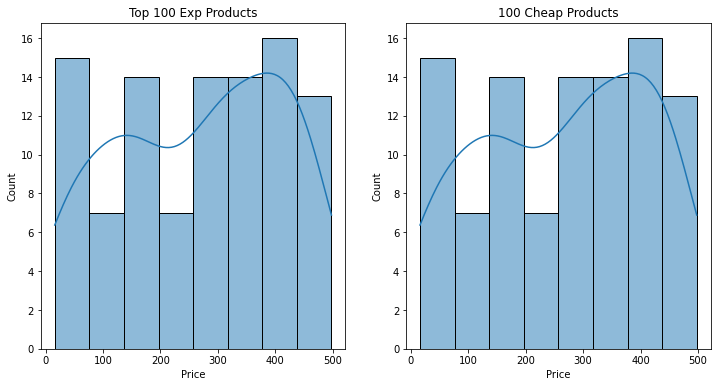

In [15]:
#Price Distribution for Expensive vs. Cheap Products
top_100_expensive = data.nlargest(100, 'Price')
bottom_100_cheap = data.nsmallest(100, 'Price')

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(top_100_expensive['Price'], kde=True)
plt.title('Top 100 Exp Products')

plt.subplot(1, 2, 2)
sns.histplot(bottom_100_cheap['Price'], kde=True)
plt.title('100 Cheap Products')

In [ ]:
#histograms are nearly identical, this suggests that the pricing   top and bottom 100 products might have similar distributions, which could be unusual.

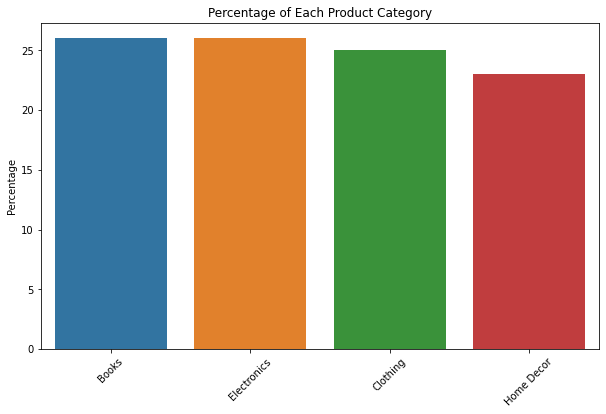

In [17]:
category_count = data['Category'].value_counts(normalize=True) * 100
plt.figure(figsize=(10,6))
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Percentage of Each Product Category')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()


In [ ]:
#clear indication that the store is having books ,electronics as main category and clothing follows them and with comapritvely less no of products decor category comes in.

In [ ]:
#EDA on customer data


In [18]:
data2 = pd.read_csv("D:\ZEOTAP interview\Customers.csv")

In [19]:

print(data2.head())

# about the dataset
print(data2.info())

#  missing values
print(data.isnull().sum())

#  statistics
print(data.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


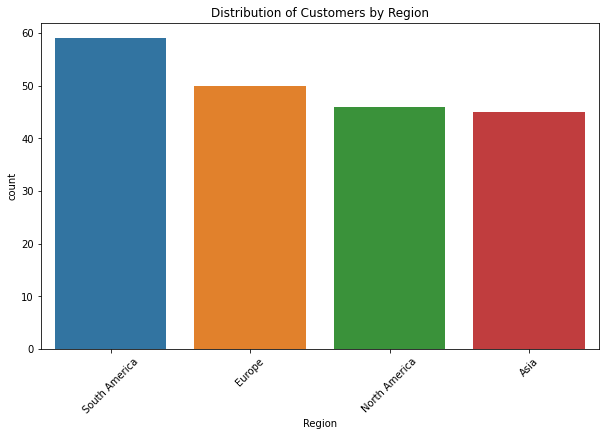

In [22]:
# Distribution of Customers by Region
plt.figure(figsize=(10,6))
sns.countplot(data2['Region'], order = data2['Region'].value_counts().index)
plt.title('Distribution of Customers by Region')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#More customers from south american region follwed by europe, north america and asia as follows.

In [24]:
# Customers per Region to a idea of number 
region_counts = data2['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Customer_count']
print(region_counts)

          Region  Customer_count
0  South America              59
1         Europe              50
2  North America              46
3           Asia              45


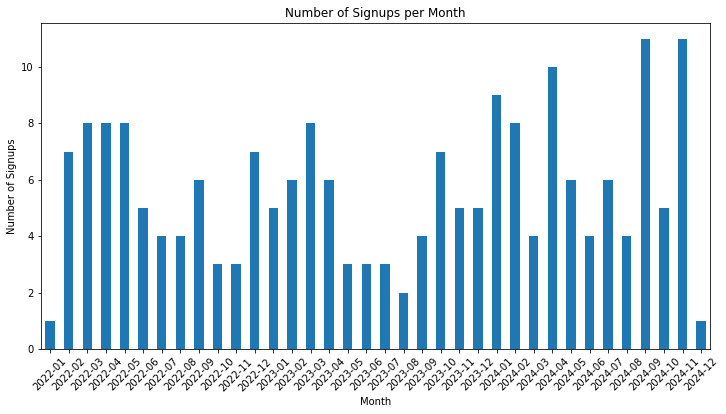

In [32]:

data2['SignupDate'] = pd.to_datetime(data2['SignupDate'], format='%y-%m-%d')

# Extract month and year from SignupDate
data2['signup_month'] = data2['SignupDate'].dt.to_period('M')

# Number of signups per month
monthly_signups = data2['signup_month'].value_counts().sort_index()

# Plot the number of signups per month
plt.figure(figsize=(12,6))
monthly_signups.plot(kind='bar')
plt.title('Number of Signups per Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#we get the idea odf which month and year we got more signups here 2024 AUg and 2024 nov is having more signups. 

In [ ]:
#Now to perform EDA on transaction table we can merge as there are similar columns.

In [37]:
# Load your datasets

data3 = pd.read_csv("D:\ZEOTAP interview\Transactions.csv")



# Merge datasets on customerid and productid
customer_transactions = pd.merge(data3, data, on='ProductID', how='left')
full_data = pd.merge(customer_transactions, data2, on='CustomerID', how='left')


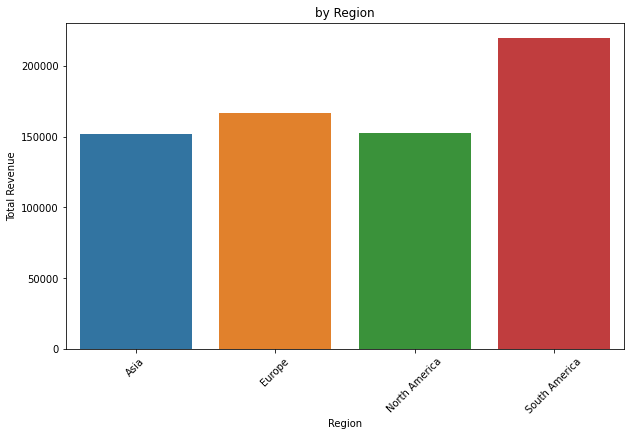

In [38]:
# Group by region and calculate total revenue
region_revenue = full_data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot the total revenue by region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='TotalValue', data=region_revenue)
plt.title('by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#ONCE AGAIN AFTER MERGING WE CAN SEE SOUTH AMERICA GENERATES MORE REVENUE AS THE NO OF CUSTOMERS ARE MORE.

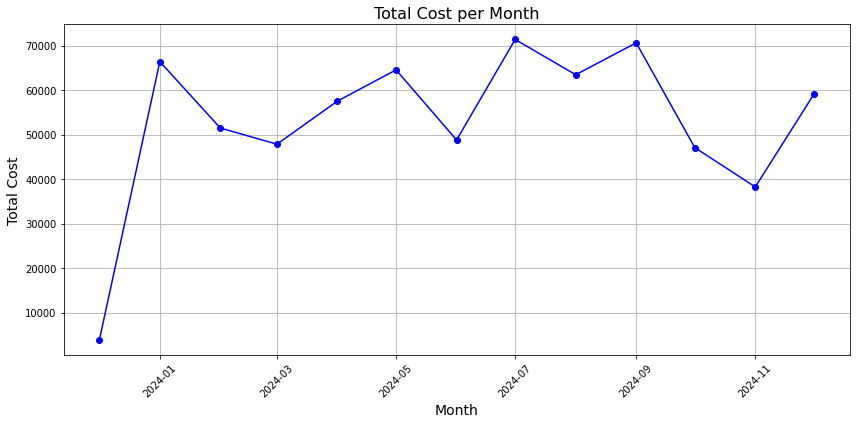

In [40]:
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])

# Extract the year and month from the TransactionDate
full_data['YearMonth'] = full_data['TransactionDate'].dt.to_period('M')

# Group by YearMonth and calculate the total cost
monthly_total_cost = full_data.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_total_cost['YearMonth'] = monthly_total_cost['YearMonth'].dt.to_timestamp()

# Plot the total cost per month
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_cost['YearMonth'], monthly_total_cost['TotalValue'], marker='o', color='b')
plt.title('Total Cost per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Cost', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#we can see peak sales rev on 2024 july follwed by 2024 september 

Top 10 Customers Who Bought Most Frequently:
    CustomerID  TransactionCount
155      C0156                11
108      C0109                11
174      C0175                10
140      C0141                10
64       C0065                10
7        C0008                10
83       C0084                 9
74       C0075                 9
164      C0165                 9
146      C0147                 9


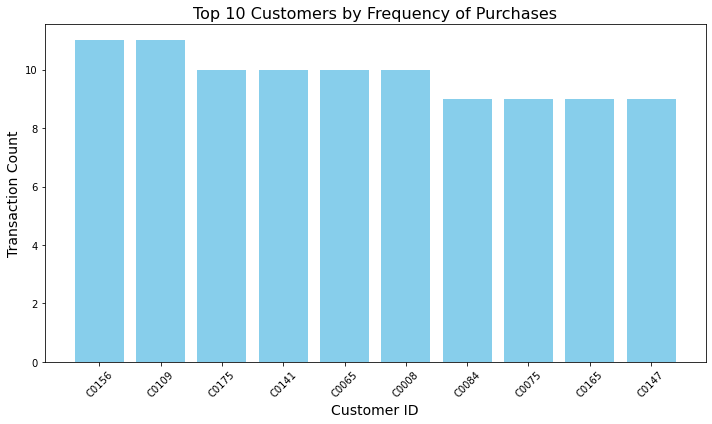

In [41]:
customer_frequency = full_data.groupby('CustomerID').size().reset_index(name='TransactionCount')

# Sort the customers by transaction count in descending order
top_customers = customer_frequency.sort_values(by='TransactionCount', ascending=False).head(10)

# Print the top 10 customers
print("Top 10 Customers Who Bought Most Frequently:")
print(top_customers)

# Optional: Plot the top 10 customers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['TransactionCount'], color='skyblue')
plt.title('Top 10 Customers by Frequency of Purchases', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#we get top 10 customers who purchased the moset C0156 tops with C0109

Product Category with the Most Revenue:
  Category  TotalValue
0    Books   192147.47


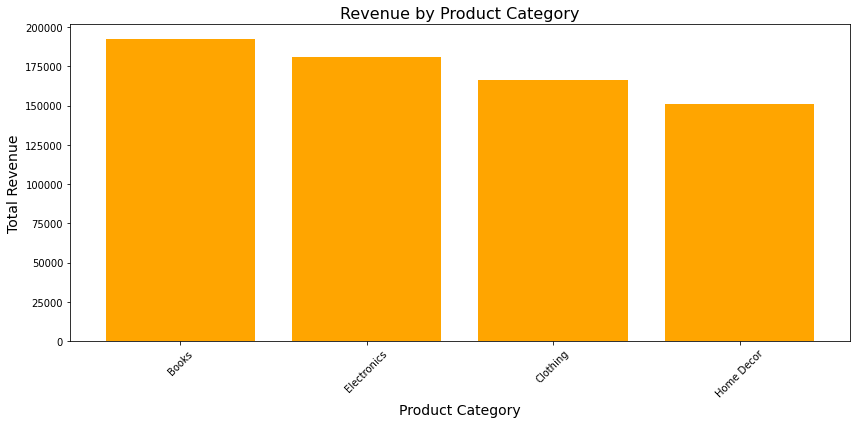

In [42]:
category_revenue = full_data.groupby('Category')['TotalValue'].sum().reset_index()

# Sort categories by total revenue in descending order
category_revenue = category_revenue.sort_values(by='TotalValue', ascending=False)

# Print the product category with the most revenue
print("Product Category with the Most Revenue:")
print(category_revenue.head(1))  # Displays the top category

# Optional: Plot revenue by product category
plt.figure(figsize=(12, 6))
plt.bar(category_revenue['Category'], category_revenue['TotalValue'], color='orange')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#WITH AROUND 1.9 lakh revenue book category is the most revenue generated category and home decor with kleast comapared.